<h3>Задания</h3>
<ul>
<li>Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.</li>
<br>
<li>Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).</li>
<br>
<li>*3. Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться
на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).</li>
</ul>

In [37]:
import matplotlib.pyplot as plt
import numpy as np


<h3>Задание 1</h3>
<p>Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40,<br> 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты <br>линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.</p>

#### $b = \frac{\overline{yx} - \overline{y} \cdot {\overline{x}}}{\overline{x^2} - (\overline{x})^2};$

#### $a = \overline{y} - b \cdot {\overline{x}}.$

In [42]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
b = (np.mean(zp * ks) - np.mean(zp) * np.mean(ks)) / (np.mean(zp * zp) - np.mean(zp)**2)
a = np.mean(ks) - b * np.mean(zp)
print(f'b = {b}, a = {a}')


b = 2.620538882402765, a = 444.1773573243596


#### $b = (x^T \cdot x)^{-1} \cdot x^T \cdot y$

In [39]:
zp = zp.reshape(10,1)
ks = ks.reshape(10,1)
b1 = np.linalg.inv((np.transpose(zp) @ zp)) @ np.transpose(zp) @ ks
print(b1)
zp = np.hstack([np.ones((10,1)), zp])
b2 = np.linalg.inv((np.transpose(zp) @ zp)) @ np.transpose(zp) @ ks
print(b2)

[[5.88982042]]
[[444.17735732]
 [  2.62053888]]


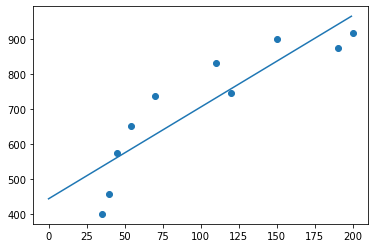

In [43]:
plt.scatter(zp, ks)
x = np.array(range(0, 200))
plt.plot(x, (a + b*x))

<h3>Задание 2</h3>
Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [62]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

n=len(x)
b = 0.1
a = 0.000001


def mse(b, y=ks, x=zp, n=n):
    return 1/n * np.sum(((b * x - y) ** 2) / n)

for i in range(5000):
    b -= a * (2 / n) * np.sum((b * zp - ks) * zp)
    if i % 500 == 0:
        print(f'i = {i}, mse = {mse(b)}')

i = 0, mse = 129.26618552337092
i = 500, mse = 43.13550234327866
i = 1000, mse = 21.436726011421833
i = 1500, mse = 15.970185204872532
i = 2000, mse = 14.593007619710914
i = 2500, mse = 14.246057296245063
i = 3000, mse = 14.158650611551652
i = 3500, mse = 14.136630374035294
i = 4000, mse = 14.13108284798534
i = 4500, mse = 14.129685267906925
